In [1]:
# Plot PKR functional scores by secondary structural element (windows)
# Figures 2D and 5D

In [4]:
import os
import pandas as pd
from scipy.stats import f_oneway,tukey_hsd,ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# figure save directory
save_dir = "../../results/figures/pkr-windows"
os.makedirs(save_dir, exist_ok=True)

In [6]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'
df = pd.read_csv(input_file)

def pkr_type(x, pkr_stop = 551):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x[-2:] == 'WT':
        return "WT"
    else:
        return 'Variant'
df['pkr_type'] = df['pkr'].apply(pkr_type)

PKR Variants Paired with K3Δ58


/tmp/ipykernel_3355746/1752256796.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['α0/β1', 'αD', 'Activation\nLoop', 'αG'])


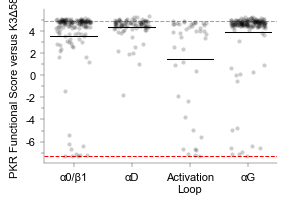

Oneway ANOVA F statistic: 11.013949801336771
Oneway ANOVA P value: 5.629962242221496e-07

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.788     0.175    -1.785     0.208
 (0 - 2)      2.140     0.000     0.866     3.414
 (0 - 3)     -0.326     0.748    -1.165     0.513
 (1 - 0)      0.788     0.175    -0.208     1.785
 (1 - 2)      2.928     0.000     1.563     4.293
 (1 - 3)      0.462     0.610    -0.509     1.433
 (2 - 0)     -2.140     0.000    -3.414    -0.866
 (2 - 1)     -2.928     0.000    -4.293    -1.563
 (2 - 3)     -2.466     0.000    -3.721    -1.211
 (3 - 0)      0.326     0.748    -0.513     1.165
 (3 - 1)     -0.462     0.610    -1.433     0.509
 (3 - 2)      2.466     0.000     1.211     3.721

PKR Variants Paired with K3


/tmp/ipykernel_3355746/1752256796.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['α0/β1', 'αD', 'Activation\nLoop', 'αG'])


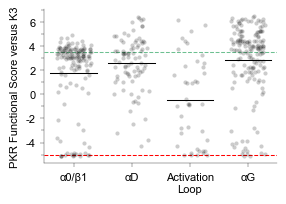

Oneway ANOVA F statistic: 14.969521799769376
Oneway ANOVA P value: 2.813512252712557e-09

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.790     0.209    -1.834     0.255
 (0 - 2)      2.260     0.000     0.924     3.595
 (0 - 3)     -1.010     0.017    -1.890    -0.130
 (1 - 0)      0.790     0.209    -0.255     1.834
 (1 - 2)      3.049     0.000     1.618     4.480
 (1 - 3)     -0.220     0.944    -1.239     0.798
 (2 - 0)     -2.260     0.000    -3.595    -0.924
 (2 - 1)     -3.049     0.000    -4.480    -1.618
 (2 - 3)     -3.269     0.000    -4.585    -1.954
 (3 - 0)      1.010     0.017     0.130     1.890
 (3 - 1)      0.220     0.944    -0.798     1.239
 (3 - 2)      3.269     0.000     1.954     4.585

PKR Variants Paired with K3-H47R


/tmp/ipykernel_3355746/1752256796.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['α0/β1', 'αD', 'Activation\nLoop', 'αG'])


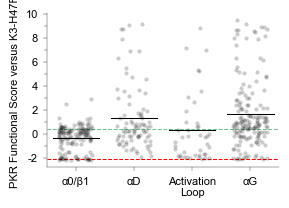

Oneway ANOVA F statistic: 19.243107626342596
Oneway ANOVA P value: 1.0317763311408547e-11

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.610     0.000    -2.452    -0.768
 (0 - 2)     -0.639     0.420    -1.716     0.438
 (0 - 3)     -1.986     0.000    -2.695    -1.277
 (1 - 0)      1.610     0.000     0.768     2.452
 (1 - 2)      0.971     0.133    -0.182     2.124
 (1 - 3)     -0.376     0.638    -1.197     0.445
 (2 - 0)      0.639     0.420    -0.438     1.716
 (2 - 1)     -0.971     0.133    -2.124     0.182
 (2 - 3)     -1.347     0.006    -2.407    -0.287
 (3 - 0)      1.986     0.000     1.277     2.695
 (3 - 1)      0.376     0.638    -0.445     1.197
 (3 - 2)      1.347     0.006     0.287     2.407



In [10]:
for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3","K3-H47R"]):
    temp_df = df.query('k3 == @k3 and pkr_type != "Nonsense"')
    
    # plot parameters
    width_in = 3 #2
    height_in = 2
    font_size = 8
    font = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .2
    marker_diameter = 3
    ymin = -5
    ymax=5.9
    
    font = {'family': font, 'size': font_size}
    plt.rc('font', **font)
    
    plt.rc('lines', linewidth=stroke)
    
    plt.figure(figsize=(width_in, height_in)) # save size
    
    ax = sns.stripplot(
        data=temp_df,
        x='pkr_regions',
        y='auc_mean',
        color='black',
        alpha=alpha_val,
        size=marker_diameter,
        order = ['Region 1','Region 2','Region 3','Region 4'],
        jitter=.3
    )

    sns.boxplot(
        showmeans=True,
        meanline=True,
        meanprops={'color': 'black', 'ls': '-', 'lw': .75},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        data=temp_df,
        x="pkr_regions",
        order = ['Region 1','Region 2','Region 3','Region 4'],
        y="auc_mean",
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax,
        zorder=0
    )
    
    # min and max
    #ax.set_ylim(ymin,ymax)
    
    # modify plot spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)

    # Set major ticks at even numbers and label as integers
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
    
    # Show minor ticks for every integer
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    # Set major tick length
    ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
    plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')
    
    # wt dashed line
    hline = temp_df.query('pkr == "PKR-WT"')['auc_mean'].values[0]
    ax.axhline(y=hline, color='#6dc091', linestyle='--', linewidth=.75, zorder=0)

    # nonsense dashed line
    hline = df.query('pkr_type == "Nonsense" and k3 == @k3')['auc_mean'].mean()
    ax.axhline(y=hline, color='red', linestyle='--', linewidth=.75, zorder=0)
    
    plt.xlabel('')
    plt.gca().set_xticklabels(['α0/β1', 'αD', 'Activation\nLoop', 'αG'])

    plt.title(f'')
    plt.ylabel(f'PKR Functional Score versus {k3_name}')
    
    # save plot
    fig = ax.get_figure()
    plot_name = f'pkr-windows_{k3_name}.svg'
    output_file = os.path.join(save_dir, plot_name)
    fig.savefig(output_file, bbox_inches='tight', format='svg', transparent=True)
    
    print(f'PKR Variants Paired with {k3_name}')
    plt.show()

    # one-way anova to reject null (no difference between means)
    r_1 = temp_df.query('pkr_regions == "Region 1" and pkr_type != "Nonsense"')['auc_mean'].to_numpy()
    r_2 = temp_df.query('pkr_regions == "Region 2" and pkr_type != "Nonsense"')['auc_mean'].to_numpy()
    r_3 = temp_df.query('pkr_regions == "Region 3" and pkr_type != "Nonsense"')['auc_mean'].to_numpy()
    r_4 = temp_df.query('pkr_regions == "Region 4" and pkr_type != "Nonsense"')['auc_mean'].to_numpy()
    
    F, p = f_oneway(r_1,r_2,r_3,r_4)
    print("Oneway ANOVA F statistic:", F)
    print("Oneway ANOVA P value:", p)
    print()
    # post-hoc testing: Tukey's Honestly-Significant Difference
    # statistic is the mean difference between the comparisons
    result = tukey_hsd(r_1,r_2,r_3,r_4)
    print(result)